In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

In [10]:
# Logistic Regression

x_0 = tf.random.normal([20], 3, 1)
x_1 = tf.random.normal([20], 5.5, 1)
y_0 = tf.zeros(20)
y_1 = tf.ones(20)

print(x_0)
print(x_1)

x = tf.concat([x_0, x_1], axis=0)
y = tf.concat([y_0, y_1], axis=0)

tf.Tensor(
[3.9868412 3.5705628 3.1794603 3.8390007 4.0045967 2.9357703 2.3844175
 2.752141  1.5923578 3.2721753 3.5191803 3.9702654 4.3685017 3.822718
 2.049305  2.549039  2.9378245 2.9167316 2.2858586 2.4225528], shape=(20,), dtype=float32)
tf.Tensor(
[5.1025014 6.597985  7.234834  5.394439  6.4014525 6.0227747 5.7620163
 5.627129  5.3607    4.9423194 6.1076727 6.1861634 5.2216816 7.779335
 7.6827497 5.682905  6.30909   5.797064  7.0187526 6.4636674], shape=(20,), dtype=float32)


In [11]:
x

<tf.Tensor: shape=(40,), dtype=float32, numpy=
array([3.9868412, 3.5705628, 3.1794603, 3.8390007, 4.0045967, 2.9357703,
       2.3844175, 2.752141 , 1.5923578, 3.2721753, 3.5191803, 3.9702654,
       4.3685017, 3.822718 , 2.049305 , 2.549039 , 2.9378245, 2.9167316,
       2.2858586, 2.4225528, 5.1025014, 6.597985 , 7.234834 , 5.394439 ,
       6.4014525, 6.0227747, 5.7620163, 5.627129 , 5.3607   , 4.9423194,
       6.1076727, 6.1861634, 5.2216816, 7.779335 , 7.6827497, 5.682905 ,
       6.30909  , 5.797064 , 7.0187526, 6.4636674], dtype=float32)>

In [16]:
def plot_graph(X, Y, X_hat=None, Y_hat=None, str_title=None):
    fig = plt.figure(figsize=(8,6))
    
    if str_title is not None:
        plt.title(str_title, fontsize=20)
    
    plt.plot(X, Y, ls="none", marker="x")
    
    if X_hat is not None and Y_hat is not None:
        plt.plot(X_hat, Y_hat)
    
    plt.tick_params(axis="both", labelsize=14)

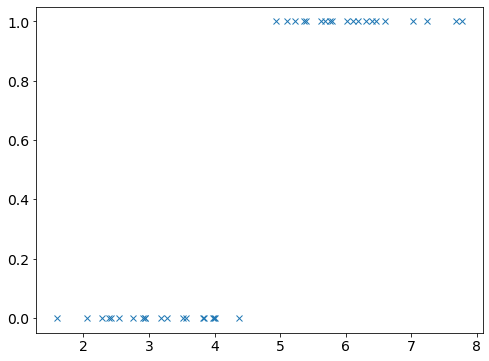

In [17]:
plot_graph(x, y)

In [23]:
W = tf.Variable(tf.random_normal_initializer(stddev=1)([1]))
b = tf.Variable(tf.random_normal_initializer(stddev=1)([1]))

print(W)
print(b)

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([1.7451856], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-0.19985001], dtype=float32)>


In [32]:
def cross_entropy(y_pred, y_true):
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)  # 최소값 1e-9, 최대값 1.로 지정. 그 사이값이면 그냥 자기 자신
    return -tf.reduce_sum(y_true*tf.math.log(y_pred) + (1-y_true)*tf.math.log(1-y_pred))

In [35]:
lr = 0.001
optimizer = tf.optimizers.SGD(learning_rate=lr)

def run_optimizer():
    with tf.GradientTape() as g:
        pred = 1/(1 + tf.math.exp(-1*(x*W+b)))
        loss = cross_entropy(pred, y)
    
    gradients = g.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W,b]))

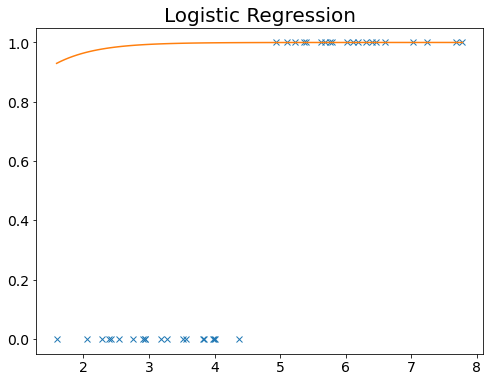

In [26]:
x_f1 = np.linspace(np.min(x), np.max(x), 100)
plot_graph(x, y, X_hat=x_f1, Y_hat=1/(1+tf.math.exp(-1*(x_f1*W+b))), str_title="Logistic Regression")

In [44]:
training_steps = 10000
display_step = 500
for step in range(1, training_steps+1):
    run_optimizer()
    
    if step % display_step == 0:
        pred = 1/(1+tf.math.exp(-1*(W*x+b)))
        loss = cross_entropy(pred, y)
        print("step :", step, ", loss :", loss.numpy())


step : 500 , loss : 4.4127607
step : 1000 , loss : 4.1971383
step : 1500 , loss : 4.0075364
step : 2000 , loss : 3.8391933
step : 2500 , loss : 3.688471
step : 3000 , loss : 3.5525403
step : 3500 , loss : 3.4291692
step : 4000 , loss : 3.316564
step : 4500 , loss : 3.2132635
step : 5000 , loss : 3.1180766
step : 5500 , loss : 3.0300097
step : 6000 , loss : 2.9482307
step : 6500 , loss : 2.872034
step : 7000 , loss : 2.800826
step : 7500 , loss : 2.7340927
step : 8000 , loss : 2.671389
step : 8500 , loss : 2.6123352
step : 9000 , loss : 2.556593
step : 9500 , loss : 2.5038714
step : 10000 , loss : 2.4539135


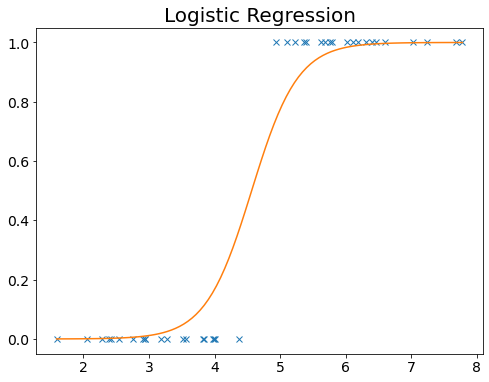

In [45]:
x_f1 = np.linspace(np.min(x), np.max(x), 100)
plot_graph(x, y, X_hat=x_f1, Y_hat=1/(1+tf.math.exp(-1*(x_f1*W+b))), str_title="Logistic Regression")

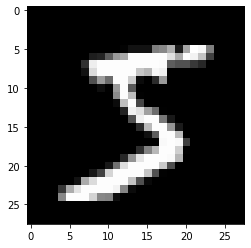

Label : 5


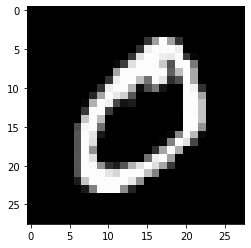

Label : 0


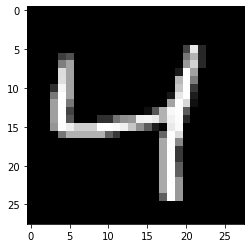

Label : 4


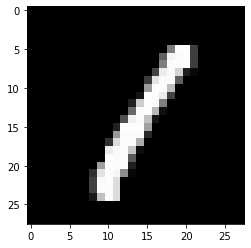

Label : 1


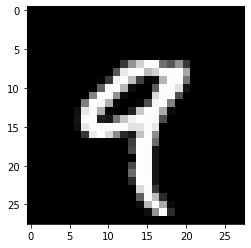

Label : 9


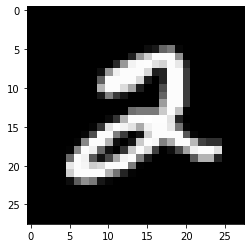

Label : 2


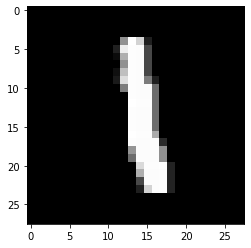

Label : 1


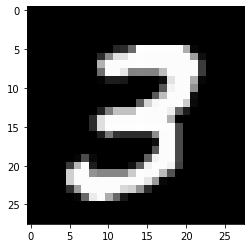

Label : 3


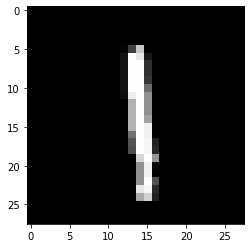

Label : 1


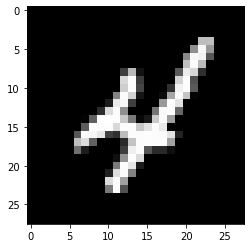

Label : 4


In [48]:
# Sofrmax

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# plt.imshow(x_train[100], cmap="gray")
for i in range(10):
    plt.imshow(x_train[i], cmap="gray")
    plt.show()
    print("Label : {}".format(y_train[i]))

In [54]:
x_train, x_test = x_train.astype("float32"), tf.cast(x_test, tf.float32)

print(x_train.dtype)
print(x_test.dtype)

float32
<dtype: 'float32'>


In [55]:
num_classes = 10
num_features = x_train.shape[1] * x_train.shape[2]  # 28 * 28 = 784

print(x_train.shape, x_test.shape)
x_train, x_test = tf.reshape(x_train, [-1, 784]), tf.reshape(x_test, [-1, 784])
print(x_train.shape, x_test.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 784) (10000, 784)


In [57]:
W = tf.Variable(tf.random_normal_initializer(stddev=1)([num_features, num_classes]))
b = tf.Variable(tf.random_normal_initializer(stddev=1)([num_classes]))

print(W, b)

<tf.Variable 'Variable:0' shape=(784, 10) dtype=float32, numpy=
array([[ 0.79197717, -1.131111  ,  1.6587342 , ...,  1.2500193 ,
        -1.1102936 ,  0.5073211 ],
       [ 0.05488074,  0.9527809 , -0.24288355, ..., -0.45667332,
        -2.0232387 ,  0.5104552 ],
       [-1.0036199 , -0.04079075,  2.0626738 , ..., -0.68655396,
        -1.0730895 ,  0.14973624],
       ...,
       [ 1.0188084 , -0.33444825,  0.04166285, ...,  0.01579366,
         0.10025237,  0.5633319 ],
       [ 0.30713168, -0.84468114,  1.1326637 , ..., -2.137238  ,
        -0.39124927,  1.6970681 ],
       [-0.17846096, -1.1516916 ,  1.0244898 , ..., -0.0087656 ,
         0.4040944 ,  1.3811097 ]], dtype=float32)> <tf.Variable 'Variable:0' shape=(10,) dtype=float32, numpy=
array([ 0.5714776 ,  1.5619512 ,  0.2876568 ,  0.07719883, -0.2890212 ,
       -1.3109047 ,  0.06569927, -0.348075  , -0.8163057 , -1.0142268 ],
      dtype=float32)>


In [77]:
lr = 0.001
optimizer = tf.optimizers.SGD(learning_rate=lr)

def run_optimization(x, y):
    with tf.GradientTape() as g:
        pred = softmax_transformation(x)
        loss = categorical_cross_entropy(pred, y)
    gradients = g.gradient(loss, [W, b])
    optimizer.apply_gradients(zip(gradients, [W, b]))

def softmax_transformation(x):
    return tf.nn.softmax(tf.matmul(x, W)+b)

def categorical_cross_entropy(y_pred, y_true):
    y_true = tf.one_hot(y_true, depth=num_classes)
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    return tf.reduce_mean(-tf.reduce_sum(y_true*tf.math.log(y_pred), axis=1))

def accuracy(y_pred, y_true):
    correct_prediction = tf.equal(tf.argmax(y_pred, axis=1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [63]:
batch_size = 200
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))

In [64]:
train_data = train_data.shuffle(60000).batch(batch_size).prefetch(1)

In [78]:
num_epoch = 15
display_step = 100

for epoch in range(1, num_epoch+1):
    for step, (batch_x, batch_y) in enumerate(train_data, 1):
        run_optimization(batch_x, batch_y)
        
        if step % display_step == 0:
            pred = softmax_transformation(batch_x)
            loss = categorical_cross_entropy(pred, batch_y)
            acc = accuracy(pred, batch_y)
            print("epoch :", epoch, ", step :", step, ", loss :", loss.numpy(), ", accuracy :", acc.numpy())

epoch : 1 , step : 100 , loss : 11.190564 , accuracy : 0.46
epoch : 1 , step : 200 , loss : 10.6724825 , accuracy : 0.485
epoch : 1 , step : 300 , loss : 10.879714 , accuracy : 0.475
epoch : 2 , step : 100 , loss : 12.318439 , accuracy : 0.405
epoch : 2 , step : 200 , loss : 11.915879 , accuracy : 0.425
epoch : 2 , step : 300 , loss : 11.915879 , accuracy : 0.425
epoch : 3 , step : 100 , loss : 10.568866 , accuracy : 0.49
epoch : 3 , step : 200 , loss : 12.2267275 , accuracy : 0.41
epoch : 3 , step : 300 , loss : 10.983332 , accuracy : 0.47
epoch : 4 , step : 100 , loss : 9.947168 , accuracy : 0.52
epoch : 4 , step : 200 , loss : 11.29418 , accuracy : 0.455
epoch : 4 , step : 300 , loss : 11.397797 , accuracy : 0.45
epoch : 5 , step : 100 , loss : 12.019495 , accuracy : 0.42
epoch : 5 , step : 200 , loss : 12.43396 , accuracy : 0.4
epoch : 5 , step : 300 , loss : 10.050784 , accuracy : 0.515
epoch : 6 , step : 100 , loss : 10.776098 , accuracy : 0.48
epoch : 6 , step : 200 , loss : 10.

In [80]:
pred = softmax_transformation(x_test)
acc = accuracy(pred, y_test)
print(acc)
print(acc.numpy())

tf.Tensor(0.4668, shape=(), dtype=float32)
0.4668
